<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/Bitcoin_data_collection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data collection

In [ ]:
!pip install yfinance pandas

In [48]:
!pip install pycoingecko

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import requests

# Set seaborn style for better visualization
sns.set_style("darkgrid")

In [32]:
# Define the coins and their tickers
COINS = {
    "bitcoin": "BTC-USD",
    "ethereum": "ETH-USD",
    "solana": "SOL-USD"
}

# Function to fetch historical price data
def fetch_crypto_data(coin_id, ticker):
    print(f"Fetching data for {coin_id.upper()}...")

    crypto = yf.Ticker(ticker)
    df = crypto.history(period="max")

    if df.empty:
        print(f"Error: No historical data found for {coin_id}.")
        return None

    # Format data
    df.reset_index(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m-%d')

    # Keep relevant columns
    df = df[["Date", "Close", "High", "Low", "Open", "Volume"]]

    return df

# Main function
def main():
    for coin_id, ticker in COINS.items():
        df = fetch_crypto_data(coin_id, ticker)
        if df is not None:
            filename = f"{coin_id}_prices.csv"
            df.to_csv(filename, index=False)
            print(f"Data saved to {filename}")

if __name__ == "__main__":
    main()


Fetching data for BITCOIN...
Data saved to bitcoin_prices.csv
Fetching data for ETHEREUM...
Data saved to ethereum_prices.csv
Fetching data for SOLANA...
Data saved to solana_prices.csv


In [33]:
# Load CSV files
btc = pd.read_csv('bitcoin_prices.csv', parse_dates=['Date'], index_col='Date')
eth = pd.read_csv('ethereum_prices.csv', parse_dates=['Date'], index_col='Date')
sol = pd.read_csv('solana_prices.csv', parse_dates=['Date'], index_col='Date')

In [34]:
#view data
btc.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [35]:
eth.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984
2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984
2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992
2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936
2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984


In [36]:
sol.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-04-10,0.951054,1.313487,0.694187,0.832005,87364276
2020-04-11,0.776819,1.049073,0.765020,0.951054,43862444
2020-04-12,0.882507,0.956670,0.762426,0.785448,38736897
2020-04-13,0.777832,0.891603,0.773976,0.890760,18211285
2020-04-14,0.661925,0.796472,0.628169,0.777832,16747614


In [37]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3807 entries, 2014-09-17 to 2025-02-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3807 non-null   float64
 1   High    3807 non-null   float64
 2   Low     3807 non-null   float64
 3   Open    3807 non-null   float64
 4   Volume  3807 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 178.5 KB


In [38]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2658 entries, 2017-11-09 to 2025-02-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2658 non-null   float64
 1   High    2658 non-null   float64
 2   Low     2658 non-null   float64
 3   Open    2658 non-null   float64
 4   Volume  2658 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 124.6 KB


In [39]:
sol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1775 entries, 2020-04-10 to 2025-02-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1775 non-null   float64
 1   High    1775 non-null   float64
 2   Low     1775 non-null   float64
 3   Open    1775 non-null   float64
 4   Volume  1775 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 83.2 KB


## Exploratory Data Analysis

### Summary Statistics

In [40]:
# summary statistics
btc.describe()

,Close,High,Low,Open,Volume
count,3807.000000,3807.000000,3807.000000,3807.000000,3.807000e+03
mean,20587.991193,21022.647802,20086.369442,20564.123041,1.897846e+10
std,23711.471881,24191.605193,23160.842989,23683.862047,2.071116e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1278.034973,1287.570007,1265.265015,1275.320007,5.127045e+08
50%,9508.993164,9680.367188,9296.872070,9491.626953,1.505308e+10
75%,32941.566406,34125.681641,31323.410156,32844.773438,3.019101e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [41]:
eth.describe()

,Close,High,Low,Open,Volume
count,2658.000000,2658.000000,2658.000000,2658.000000,2.658000e+03
mean,1520.832086,1561.608189,1474.428655,1520.105054,1.326842e+10
std,1235.308406,1268.291134,1198.794715,1235.588167,1.082310e+10
min,84.308296,85.342743,82.829887,84.279694,6.217330e+08
25%,274.324028,283.355255,265.509178,273.858871,5.673422e+09
50%,1455.794006,1524.831909,1415.311829,1449.178955,1.078676e+10
75%,2472.060547,2551.063110,2404.322998,2471.199890,1.798826e+10
max,4812.087402,4891.704590,4718.039062,4810.071289,9.245355e+10


In [42]:
sol.describe()

,Close,High,Low,Open,Volume
count,1775.000000,1775.000000,1775.000000,1775.000000,1.775000e+03
mean,72.475326,75.313932,69.523772,72.390474,1.697939e+09
std,71.119623,73.721297,68.421156,71.120493,2.239014e+09
min,0.515273,0.559759,0.505194,0.513391,6.520200e+05
25%,18.246237,18.979635,17.388174,18.233952,2.604485e+08
50%,35.556404,37.223209,33.735134,35.482449,1.069991e+09
75%,136.751877,142.627663,131.819023,136.584198,2.442330e+09
max,261.869751,294.334961,253.187439,261.872437,3.317296e+10


### Frequency Distribution

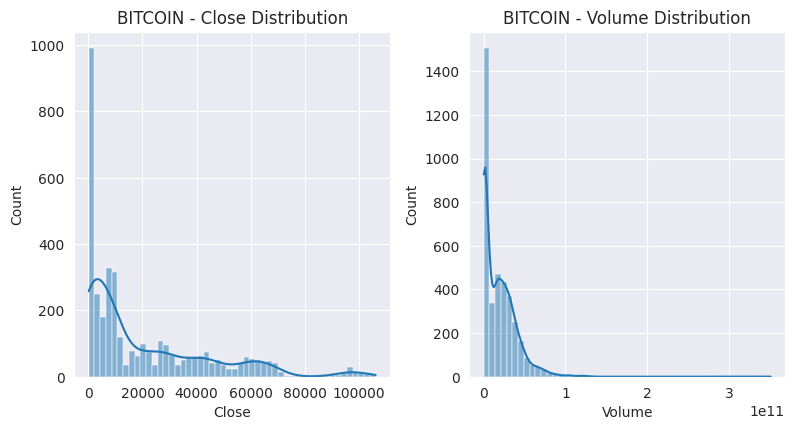

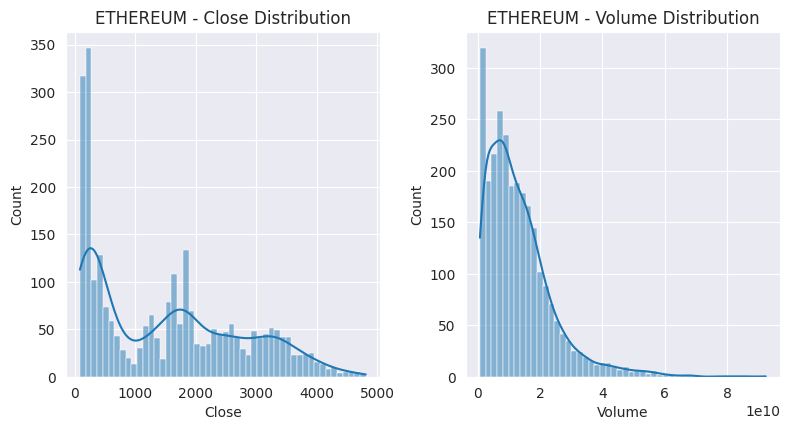

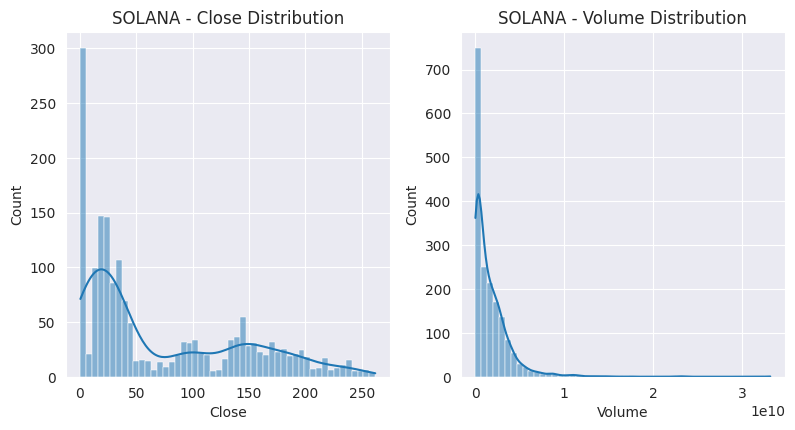

In [51]:
import seaborn as sns

def plot_histograms(df, coin_name):
    numeric_cols = ["Close", "Volume"]

    plt.figure(figsize=(12, 8))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 3, i)
        if col in df.columns and df[col].notna().sum() > 0:
            sns.histplot(df[col].dropna(), bins=50, kde=True)
            plt.title(f"{coin_name.upper()} - {col} Distribution")
        else:
            plt.title(f"{coin_name.upper()} - {col} (No Data)")

    plt.tight_layout()
    plt.show()

# Usage:
plot_histograms(btc, "Bitcoin")
plot_histograms(eth, "Ethereum")
plot_histograms(sol, "Solana")

### Closing Price Over Time

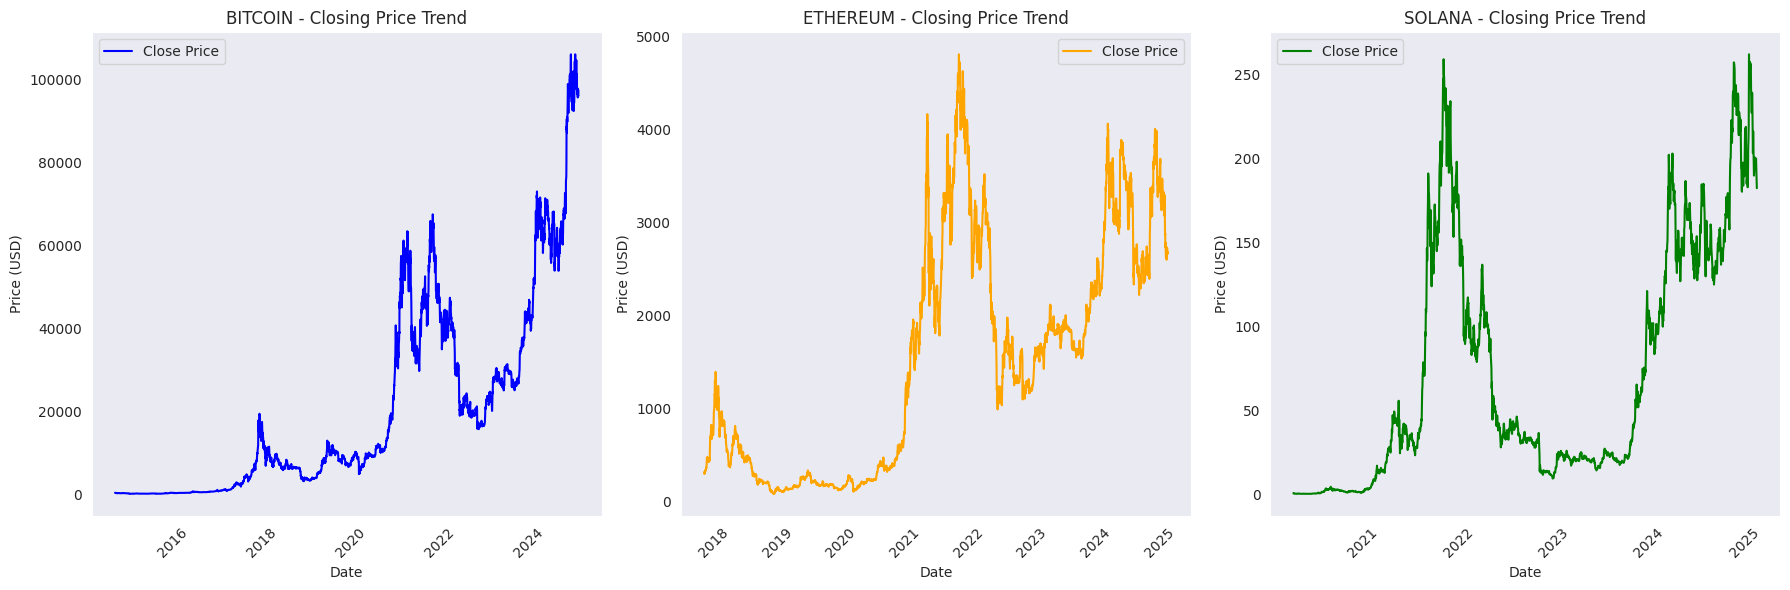

In [45]:
def plot_price_trend_horizontal(btc, eth, sol):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    coins = [("Bitcoin", btc), ("Ethereum", eth), ("Solana", sol)]
    colors = ["blue", "orange", "green"]

    for ax, (coin_name, df), color in zip(axes, coins, colors):
        ax.plot(df.index, df["Close"], label="Close Price", color=color)
        ax.set_title(f"{coin_name.upper()} - Closing Price Trend")
        ax.set_xlabel("Date")
        ax.set_ylabel("Price (USD)")
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.grid()

    plt.tight_layout()
    plt.show()

# Usage:
plot_price_trend_horizontal(btc, eth, sol)

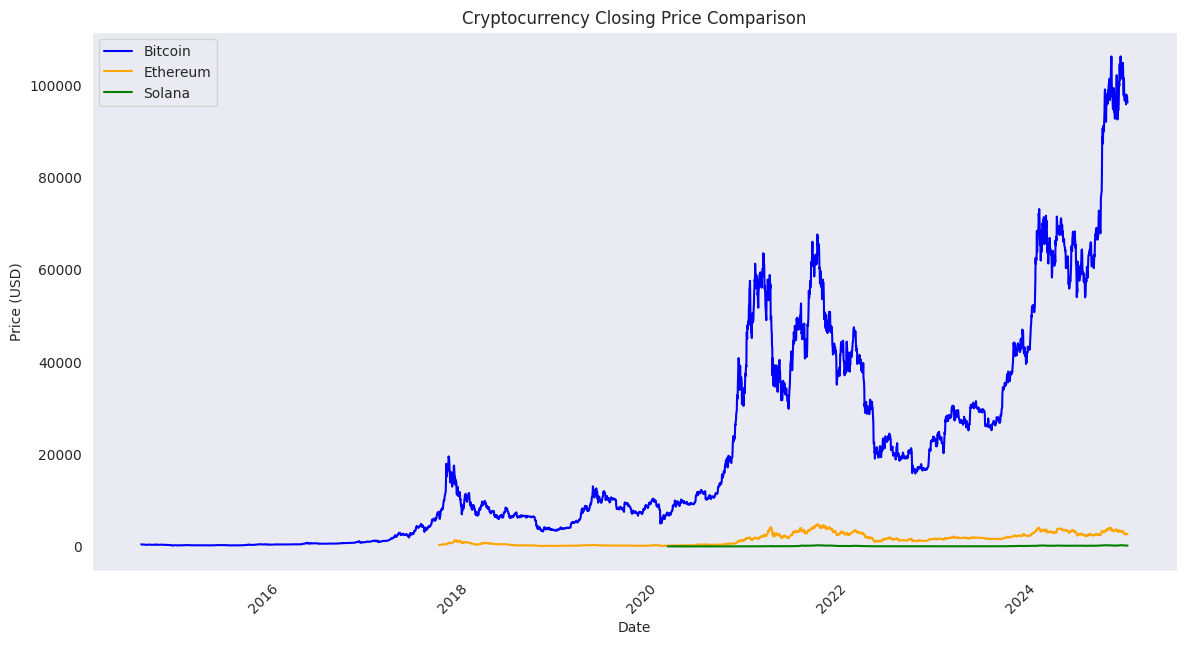

In [46]:
import matplotlib.pyplot as plt

def plot_price_comparison(btc, eth, sol):
    plt.figure(figsize=(14, 7))

    # Plot each coin's closing price
    plt.plot(btc.index, btc["Close"], label="Bitcoin", color="blue")
    plt.plot(eth.index, eth["Close"], label="Ethereum", color="orange")
    plt.plot(sol.index, sol["Close"], label="Solana", color="green")

    # Title and labels
    plt.title("Cryptocurrency Closing Price Comparison")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")

    # Legend and grid
    plt.legend()
    plt.grid()

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# Usage:
plot_price_comparison(btc, eth, sol)

### **Key Insights**

**1️⃣ Bitcoin (BTC) Dominates Price Trends**
- **BTC (orange)** remains the highest-priced cryptocurrency.
- Surged past **$100,000 in 2024**, showing strong market confidence.
- **Historical peaks in 2017, 2021, and 2024** indicate repeated bull cycles.

**2️⃣ Ethereum (ETH) Shows Moderate Growth**
- **ETH (blue)** has a much lower price range compared to BTC.
- Peaked around **$5,000** in previous bull cycles.
- **Gradual upward trend**, showing solid adoption.

**3️⃣ Solana (SOL) Remains Relatively Lower in Price**
- **SOL (purple)** shows price spikes after 2021 but remains below BTC & ETH.




###  Moving Averages (EMA)

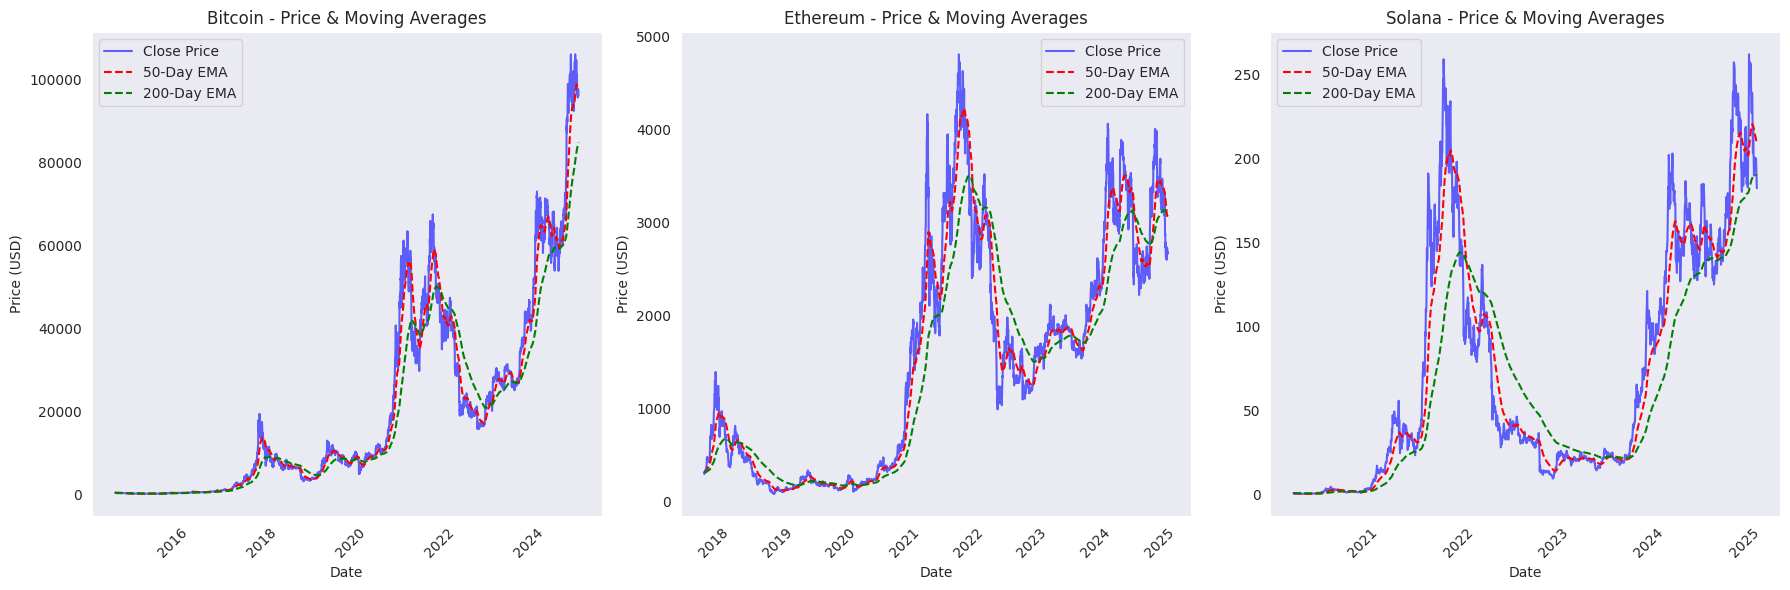

In [54]:
def plot_price_trend_horizontal(btc, eth, sol):
    # Create subplots: 1 row, 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    # Plot for Bitcoin
    btc["EMA_50"] = btc["Close"].ewm(span=50, adjust=False).mean()
    btc["EMA_200"] = btc["Close"].ewm(span=200, adjust=False).mean()
    axes[0].plot(btc.index, btc["Close"], label="Close Price", color="blue", alpha=0.6)
    axes[0].plot(btc.index, btc["EMA_50"], label="50-Day EMA", color="red", linestyle="dashed")
    axes[0].plot(btc.index, btc["EMA_200"], label="200-Day EMA", color="green", linestyle="dashed")
    axes[0].set_title("Bitcoin - Price & Moving Averages")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Price (USD)")
    axes[0].legend()
    axes[0].grid()

    # Plot for Ethereum
    eth["EMA_50"] = eth["Close"].ewm(span=50, adjust=False).mean()
    eth["EMA_200"] = eth["Close"].ewm(span=200, adjust=False).mean()
    axes[1].plot(eth.index, eth["Close"], label="Close Price", color="blue", alpha=0.6)
    axes[1].plot(eth.index, eth["EMA_50"], label="50-Day EMA", color="red", linestyle="dashed")
    axes[1].plot(eth.index, eth["EMA_200"], label="200-Day EMA", color="green", linestyle="dashed")
    axes[1].set_title("Ethereum - Price & Moving Averages")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Price (USD)")
    axes[1].legend()
    axes[1].grid()

    # Plot for Solana
    sol["EMA_50"] = sol["Close"].ewm(span=50, adjust=False).mean()
    sol["EMA_200"] = sol["Close"].ewm(span=200, adjust=False).mean()
    axes[2].plot(sol.index, sol["Close"], label="Close Price", color="blue", alpha=0.6)
    axes[2].plot(sol.index, sol["EMA_50"], label="50-Day EMA", color="red", linestyle="dashed")
    axes[2].plot(sol.index, sol["EMA_200"], label="200-Day EMA", color="green", linestyle="dashed")
    axes[2].set_title("Solana - Price & Moving Averages")
    axes[2].set_xlabel("Date")
    axes[2].set_ylabel("Price (USD)")
    axes[2].legend()
    axes[2].grid()

    # Rotate the x-axis labels for all subplots
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Usage example
plot_price_trend_horizontal(btc, eth, sol)

### Trading Volume Analysis

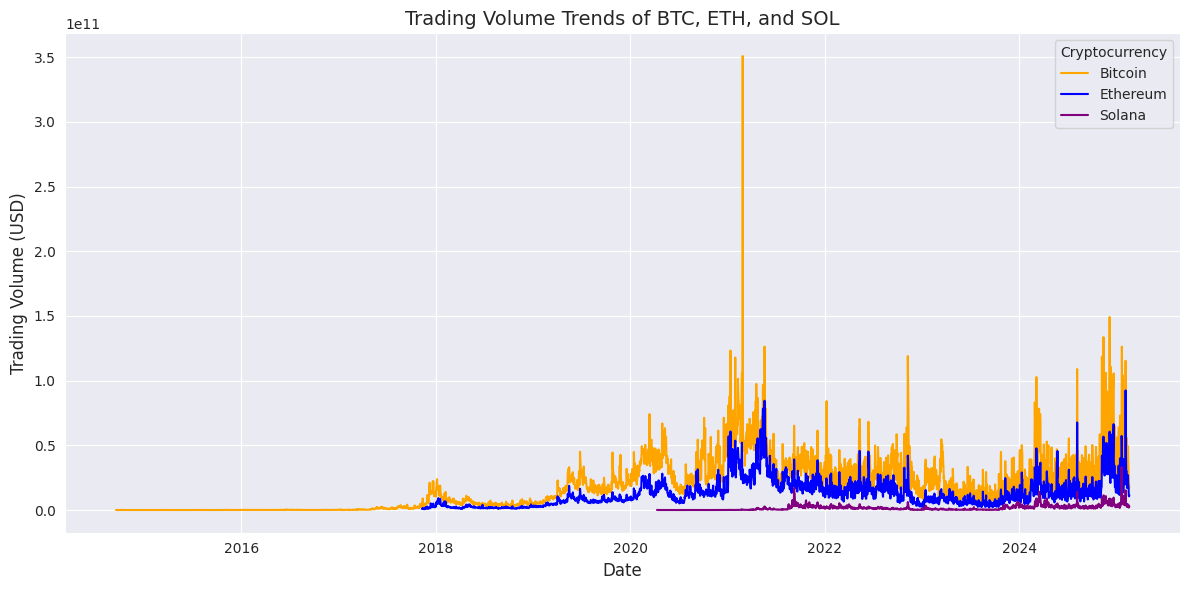

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_trading_volume(df_list, coin_names):
    # Create a figure for the plot
    plt.figure(figsize=(12, 6))

    colors = ["orange", "blue", "purple"]  # Colors for each coin

    # Loop through each dataframe and coin to plot
    for i, (df, coin_name) in enumerate(zip(df_list, coin_names)):
        # Plot the trading volume for each coin
        sns.lineplot(data=df, x="Date", y="Volume", label=coin_name, color=colors[i])

    # Chart formatting
    plt.title("Trading Volume Trends of BTC, ETH, and SOL", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Trading Volume (USD)", fontsize=12)
    plt.legend(title="Cryptocurrency")
    plt.grid(True)

    # Show the plot
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Usage with multiple coins:
plot_trading_volume([btc, eth, sol], ["Bitcoin", "Ethereum", "Solana"])

### Trading Volume Trends of BTC, ETH, and SOL   

1️⃣ Bitcoin (BTC) Dominates Trading Volume  
- **BTC (orange)** has the highest trading volume over time, especially during market peaks.  
- Major **spikes align with market cycles** (e.g., 2021 bull run).  

2️⃣ Ethereum (ETH) Has Consistently High Volume  
- **ETH (blue)** follows BTC’s trend but at a lower scale.  
- Shows **sustained liquidity**, indicating strong investor interest.  

3️⃣ Solana (SOL) Gained Traction Post-2020  
- **SOL (purple)** had minimal trading before 2020 but grew rapidly.  
- Lower volume than BTC & ETH, but **trading activity is increasing**.  

 4️⃣ Volume Spikes Correlate with Market Events  
- **2021:** Crypto bull run → **Highest trading activity ever recorded**.  
- **2022:** Market crash → **Sharp spikes, indicating panic selling**.  
- **2024:** Volume stabilizes but remains **volatile, especially for BTC**.  


### Volatility Analysis Using Rolling Standard Deviation
Volatility measures how much prices fluctuate over time. Higher volatility indicates higher risk but also higher potential returns.

- Rolling Volatility (30-Day Standard Deviation)

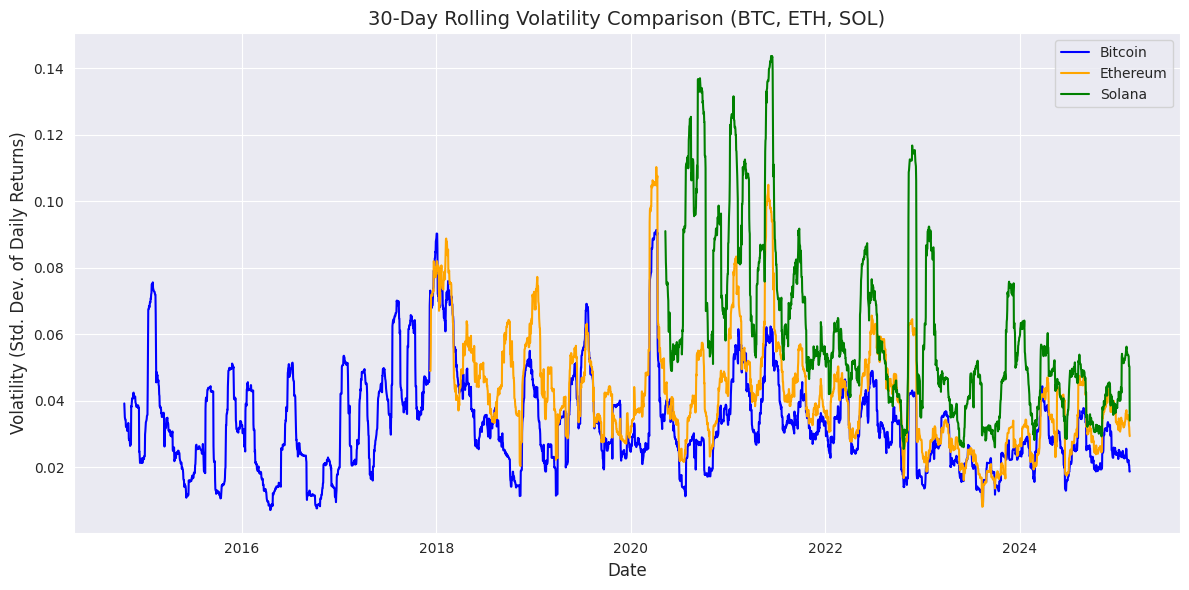

In [58]:
def plot_rolling_volatility_comparison(df_list, coin_names):
    # Create a figure for the plot
    plt.figure(figsize=(12, 6))

    colors = ["blue", "orange", "green"]  # Colors for each coin

    # Loop through each dataframe and coin to plot
    for i, (df, coin_name) in enumerate(zip(df_list, coin_names)):
        # Calculate Daily Returns
        df["Daily Return"] = df["Close"].pct_change()

        # Calculate 30-day Rolling Volatility
        df["Rolling Volatility"] = df["Daily Return"].rolling(window=30).std()

        # Plot Rolling Volatility for each coin on the same graph
        sns.lineplot(data=df, x="Date", y="Rolling Volatility", label=coin_name, color=colors[i])

    # Formatting the plot
    plt.title("30-Day Rolling Volatility Comparison (BTC, ETH, SOL)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Volatility (Std. Dev. of Daily Returns)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Usage with multiple coins:
plot_rolling_volatility_comparison([btc, eth, sol], ["Bitcoin", "Ethereum", "Solana"])

### Key Insights from the Volatility Analysis  

 1️⃣ Bitcoin (BTC) Shows the Most Stability  
- BTC (orange) maintains relatively low volatility over time.  
- This suggests it is more **established** and less reactive to short-term market movements.  

 2️⃣ Ethereum (ETH) and Solana (SOL) Are More Volatile  
- ETH (blue) experiences **moderate fluctuations**, especially during market shifts.  
- SOL (purple) has the **highest volatility**, with frequent sharp spikes.  
- Post-2021, **SOL's volatility exceeds ETH & BTC**, indicating **higher speculative activity**.  

3️⃣ Volatility Spikes Align with Major Market Events  
- 2018: Crypto market crash → Sudden surge in volatility.  
- 2020: Pandemic-driven uncertainty → Increased market swings.  
- 2021: **Bull run & corrections** → Highest volatility levels observed.  

